In [9]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.integrate import odeint
from gekko import GEKKO
m = GEKKO()

# Préliminaires

In [10]:
#TP1 PRELIMINAIRES
m = GEKKO(remote=True)

x1,x2 = [m.Var() for i in range(2)]

x1.value=5
x2.value=10

#contraintes
m.Equation(x1+x2<=2)
m.Equation(x1+2*x2<=3)
#optimisation a faire 
m.Obj(x1**2+x2**2-14*x1-6*x2-7)

m.options.IMODE = 3 

#Solve simulation
m.solve() 

print('')
print('Results')
print('x1: ' + str(x1.value))
print('x2: ' + str(x2.value))

apm 130.79.7.76_gk_model9 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:              4
 Number of total equations: -            2
 Number of slack variables: -            2
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program conta

# Probleme de contôle optimal à résoudre numériquement 1 :

2.8051981743e-16
-0.99395587784
RESULT =  [2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.4030363239, 2.403

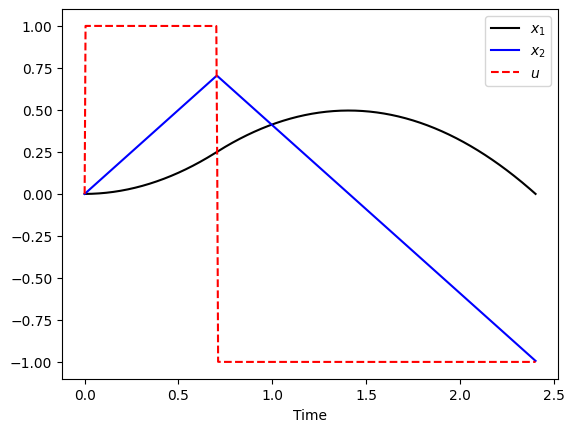

In [47]:
#2eme partie


m = GEKKO() # initialize gekkofor 
nt = 501
m.time = np.linspace(0,1,nt)



# Variables
x = m.Var(value=0)
y = m.Var(value=0)

#print(x.shape,y.shape)
p = np.zeros(nt) # mark final time point
p[-1] = 1.0
final = m.Param(value=p)

#temps final(ce qu'on cherche)
tf = m.FV(value=1.0,lb=0.1,ub=100.0)
tf.STATUS = 1

u = m.MV(value=0,lb=-1,ub=1)
u.STATUS = 1

# Equations
m.Equation(x.dt()==y*tf)
m.Equation(y.dt()==u*tf)
m.Equation(x*final==0)


m.Obj(tf+(y*final+1)**2*100000) #il faut forcer une contraint a etre respecte sinon il ne trouve pas( on force y*final a etre -1 ou x a etre 0 )
m.options.IMODE = 6
m.solve(disp=False) # solve

print(x.value[-1])
print(y.value[-1])
print("RESULT = ",tf.value)

print('Final Time: ' + str(tf.value[0]))
tm = np.linspace(0,tf.value[0],nt)
plt.figure(1)
plt.plot(tm,x.value,'k-',label=r'$x_1$')
plt.plot(tm,y.value,'b-',label=r'$x_2$')
plt.plot(tm,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.show()


# TRAM 2


In [ ]:
#3eme partie

eps = 1e-3

m = GEKKO() # initialize gekkofor 
nt = 501
m.time = np.linspace(0,1,nt)



# Variables
x = m.Var(value=0)
y = m.Var(value=0)

#print(x.shape,y.shape)
p = np.zeros(nt) # mark final time point
p[-1] = 1.0
final = m.Param(value=p)

#temps final(ce qu'on cherche)
tf = m.FV(value=1.0,lb=0.1,ub=100.0)
tf.STATUS = 1

u = m.MV(value=0,lb=-1,ub=1)
u.STATUS = 1

# Equations
m.Equation(x.dt()==y*tf)
m.Equation(y.dt()==u*tf)
m.Equation(x*final==0)
m.Equation( y*final <= -1+eps)
m.Equation( -1-eps <= y*final)

m.Obj(tf) #il faut forcer une contraint a etre respecte sinon il ne trouve pas( on force y*final a etre -1 ou x a etre 0 )
m.options.IMODE = 6
m.solve(disp=False) # solve

print(x.value[-1])
print(y.value[-1])
print("RESULT = ",tf.value)

print('Final Time: ' + str(tf.value[0]))
tm = np.linspace(0,tf.value[0],nt)
plt.figure(1)
plt.plot(tm,x.value,'k-',label=r'$x_1$')
plt.plot(tm,y.value,'b-',label=r'$x_2$')
plt.plot(tm,u.value,'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.show()
